['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te']
['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te']


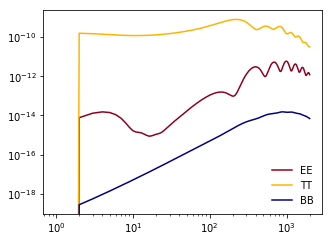

Finished
['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te']
['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te']


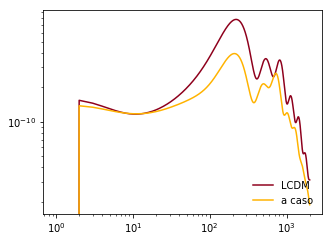

In [48]:
from classy import Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Define your cosmology (what is not specified will be set to CLASS default parameters) where?
params = {
    #choose gauge
    #'gauge': 'synchronous',
    #choose format, CAMB-> standard CAMB's normalizations
    #'format':'CAMB', #doesn't work??
    #Output choice, mapping in explanatory.ini (line 332)
    'output': 'tCl lCl pCl mPk', 
    #options for output (explanatory.ini line 661)
    'l_max_scalars': 2000,
    'lensing': 'yes',
    #Power spectrum stuff
    'non linear':'halofit',
    'P_k_max_h/Mpc': 1.,
    'z_pk': 0,
    #'number count contributions': 'density rsd lensing gr'
    ##primordial power (explanatory.ini line 454, inflation stuff at 528)
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.6711,
    ##Densities (see explanatory.ini for more) 
    ##Can use capital densities and physical densities
    'omega_b': 0.022068,
    'omega_cdm': 0.12029,
    #'Omega_Lambda': 0.68,
    ##Dark Energy, CPL-like params (use _fld as it treats it as a fluid)
    ##control switch over ppf and pff parameters
    'Omega_fld':-1,
    'w0_fld': -1.0,
    'wa_fld': 0.,
    'cs2_fld': 1,
    'use_ppf': 'yes',
    'c_gamma_over_c_fld': 0.4}

# Create an instance of the CLASS wrapper
cosmo = Class()


# Set the parameters to the cosmological code
#cosmo.set({'output':'tCl','Omega_cdm':0.3,'lensing':'yes'})
cosmo.set(params)


# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
cosmo.compute()

# Access the lensed cl until l=2000
len_cls = cosmo.lensed_cl(2000)
unlen_cls = cosmo.raw_cl(2000)
# Print on screen to see the output
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

print len_cls.keys()
print unlen_cls.keys()

ell = len_cls['ell']
fac = ell*(ell+1)/6.28

lclTT = fac*len_cls['tt']
lclBB = fac*len_cls['bb']
lclEE = fac*len_cls['ee']

cltt = fac*unlen_cls['tt']
clbb = fac*unlen_cls['bb']
clee = fac*unlen_cls['ee']

#--------------------------------------------------------------
#PLOTTING COMMANDS

fig = plt.figure(figsize=(5, 5*6/8.))
# this should be changed for making a panel of multiple figures
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')


plt.plot(ell,lclEE, color='#8E001C', label='EE')
plt.plot(ell,lclTT, color='#FFB300',label='TT')
plt.plot(ell,lclBB, color='navy', label='BB')

plt.legend(frameon=False,loc='lower right',ncol=1)

plt.show()

#plt.savefig('test_DE.pdf')
#--------------------------------------------------------------

print 'Finished'


# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
cosmo.struct_cleanup()

# If you want to change completely the cosmology, you should also
# clean the arguments, otherwise, if you are simply running on a loop
# of different values for the same parameters, this step is not needed
cosmo.empty()


params2 = {
    #choose gauge
    #'gauge': 'synchronous',
    #choose format, CAMB-> standard CAMB's normalizations
    #'format':'CAMB', #doesn't work??
    #Output choice, mapping in explanatory.ini (line 332)
    'output': 'tCl lCl pCl mPk', 
    #options for output (explanatory.ini line 661)
    'l_max_scalars': 2000,
    'lensing': 'yes',
    #Power spectrum stuff
    'non linear':'',
    'P_k_max_h/Mpc': 1.,
    'z_pk': 0,
    #'number count contributions': 'density rsd lensing gr'
    ##primordial power (explanatory.ini line 454, inflation stuff at 528)
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.6711,
    ##Densities (see explanatory.ini for more) 
    ##Can use capital densities and physical densities
    'Omega_b': 0.04,
    'Omega_cdm': 0.96,
    #'Omega_Lambda': 0.68,
    ##Dark Energy, CPL-like params (use _fld as it treats it as a fluid)
    ##control switch over ppf and pff parameters
    'Omega_fld':-1,
    'w0_fld': -0.5,
    'wa_fld': -0.3,
    'cs2_fld': 1,
    'use_ppf': 'yes',
    'c_gamma_over_c_fld': 0.4}



cosmo.set(params2)


cosmo.compute()

bg = cosmo.get_background()

# Access the lensed cl until l=2000
len_cls = cosmo.lensed_cl(2000)
unlen_cls = cosmo.raw_cl(2000)
# Print on screen to see the output
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp



print len_cls.keys()
print unlen_cls.keys()

ell = len_cls['ell']
fac = ell*(ell+1)/6.28

lclTT2 = fac*len_cls['tt']
lclBB2 = fac*len_cls['bb']
lclEE2 = fac*len_cls['ee']

cltt2 = fac*unlen_cls['tt']
clbb2 = fac*unlen_cls['bb']
clee2 = fac*unlen_cls['ee']


#--------------------------------------------------------------
#PLOTTING COMMANDS

fig = plt.figure(figsize=(5, 5*6/8.))
# this should be changed for making a panel of multiple figures
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')


plt.plot(ell,lclTT, color='#8E001C', label='LCDM')
plt.plot(ell,lclTT2, color='#FFB300',label='a caso')
#plt.plot(ell,lclBB2, color='navy', label='BB')

plt.legend(frameon=False,loc='lower right',ncol=1)

plt.show()

#plt.savefig('test_DE.pdf')
#--------------------------------------------------------------